# 研究目标

创建一个分类器来识别蔬菜和水果。

In [2]:
import os

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

加载图像。

`imread`函数读取图像后，将图像数据存储在`ndarray`，`ndarray`如何存储图像数据？

* `ndarray`用三维数组存储图像数据，第一个维度是图像高度，第二个维度是图像宽度，第三个维度表示像素的颜色。
* 数组中的每个元素，分别对应图像中的每个像素。
* RGB图像的数组形状是(height,width,3)，每个元素是一个长度为3的数组，分别表示红，绿，蓝三种颜色的值。
* BGR图像的数组形状是(height,width,3)，每个元素是一个长度为3的数组，分别表示蓝，绿，红三种颜色的值。
* `image_array[i, j]`返回代表一个像素的一维数组。

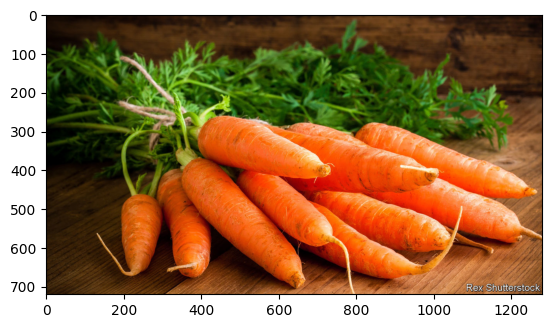

In [3]:
image_file = "data/train/carrot/Image_1.jpg"

# Load image
image = cv2.imread(image_file)
# print(type(image))

# Convert the image from BGR to RGB 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Plot the image
_ = plt.imshow(image)
# _ = plt.imshow(image, cmap='gray')

调整图像大小。

Original size: 1280 x 720 pixels
New size: 256 x 256 pixels


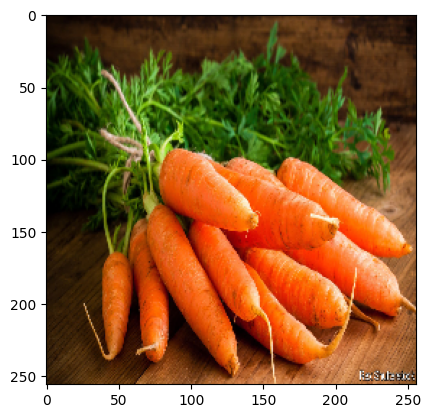

In [3]:
image_file = "data/train/carrot/Image_1.jpg"

# Load image
image = cv2.imread(image_file)
print(f"Original size: {image.shape[1]} x {image.shape[0]} pixels")

# Resize image
new_width = 256
new_height = 256
resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
print(f"New size: {resized_image.shape[1]} x {resized_image.shape[0]} pixels")

# Convert image from BGR to RGB
resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

# Plot the image
_ = plt.imshow(resized_image)

如何理解像素(pixel)？

* 像素是图像的基本组成单元，每个像素其实都是一个小方块，它包含了颜色和亮度等信息，当成千上万的像素集合到一起，就形成一副完整的图像。
* 像素包含以下信息：颜色，位置和亮度。
* 颜色通常用红，绿，蓝（RGB）三种颜色的值来表示。
* 位置，每个像素都有独特的位置，用行坐标和纵坐标来表示。
* 亮度，每个像素都有一个亮度值，用来表示像素的明暗程度。

灰度图像和彩色图像有什么区别？

从本地读取图像数据，准备特征矩阵X和目标变量y。

1. 使用彩色图像还是灰度图像？

颜色对区分类别很重要，例如白萝卜和胡萝卜的颜色是不同的，苹果，雪梨和桃子的外形很相似但颜色完全不同。因此，使用彩色图像。

2. 调整图像大小

保留足够的细节以完成分类任务，一般选择为256*256。

In [4]:
def load_images(
    directory: str, new_width: int = 256, new_height: int = 256
) -> tuple[list[np.ndarray], list[str]]:
    """Load images from a directory

    Args:
        directory: a directory containing subdirectories of images, one subdirectory per class
        new_width: the width to resize the images to
        new_height: the height to resize the images to

    Returns:
        A tuple of (images, labels)
    """
    class_names = os.listdir(directory)
    image_list = []
    label_list = []

    for name in class_names:
        subdirectory = os.path.join(directory, name)
        if os.path.isdir(subdirectory):
            for image_file in os.listdir(subdirectory):
                try:
                    image_path = os.path.join(subdirectory, image_file)
                    image = cv2.imread(image_path)
                    resized_image = cv2.resize(
                        image, (new_width, new_height), interpolation=cv2.INTER_LINEAR
                    )
                    rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
                except Exception as e:
                    print(f"{image_path}: failed to load image, {e}")
                else:
                    image_list.append(rgb_image)
                    label_list.append(name)

    return image_list, label_list

In [5]:
directory = "./data/train"
images, labels = load_images(directory)
print(f"Loaded {len(images)} images with labels {set(labels)}")

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


./data/train/bell pepper/Image_56.jpg: failed to load image, OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Loaded 3114 images with labels {'cucumber', 'potato', 'kiwi', 'eggplant', 'turnip', 'pear', 'peas', 'onion', 'pineapple', 'soy beans', 'jalepeno', 'cabbage', 'chilli pepper', 'sweetcorn', 'paprika', 'corn', 'lettuce', 'beetroot', 'watermelon', 'tomato', 'lemon', 'grapes', 'carrot', 'ginger', 'garlic', 'mango', 'capsicum', 'raddish', 'cauliflower', 'banana', 'apple', 'spinach', 'sweetpotato', 'bell pepper', 'pomegranate', 'orange'}


In [6]:
X = np.stack([image.flatten() for image in images], axis=0)

In [8]:
X.shape

(3114, 196608)

使用PCA降维。

首先将图像分割成三个通道（红，绿，蓝），然后分别对每个通道进行PCA降维，最后把三个通道的降维结果合并起来。

为什么要这么做？

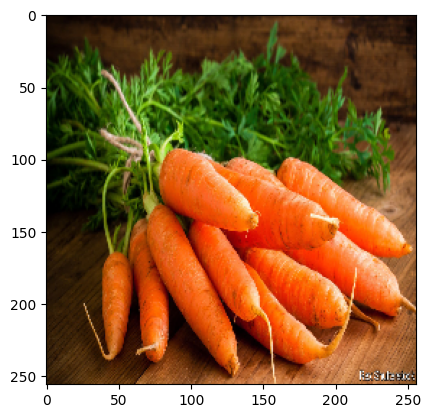

In [41]:
image_file = "data/train/carrot/Image_1.jpg"

# Load image
image = cv2.imread(image_file)

# Convert the image from BGR to RGB 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the image
image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_LINEAR)

# Plot the image
_ = plt.imshow(image)

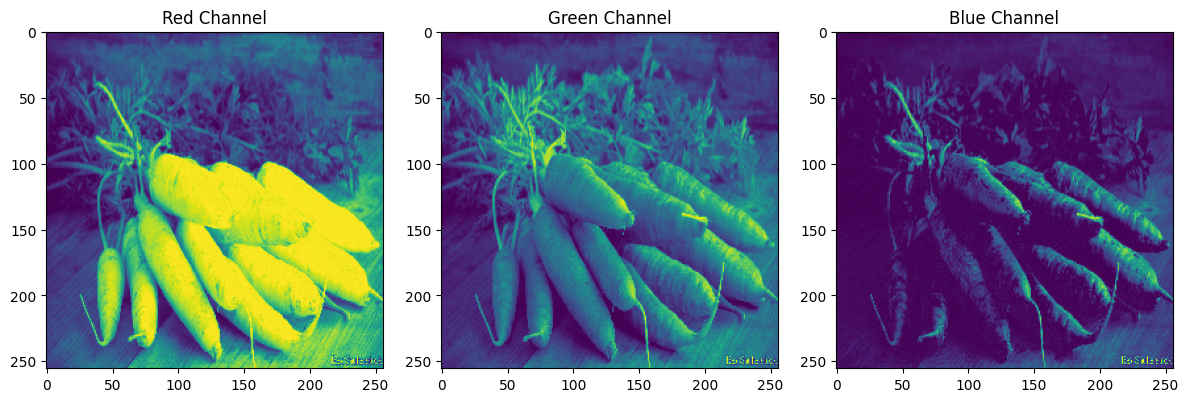

In [42]:
# Split the image into its three channels
red, green, blue = cv2.split(image)

# Plot the red channel
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 5))
ax0.imshow(red)
ax0.set_title("Red Channel")
ax1.imshow(green)
ax1.set_title("Green Channel")
ax2.imshow(blue)
ax2.set_title("Blue Channel")

plt.tight_layout()

In [43]:
# Scale the values to be between 0.0 and 1.0
scaled_red = red / 255.0
scaled_green = green / 255.0
scaled_blue = blue / 255.0


In [53]:
n_components = 20

# Fit a PCA model to the red channel
pca_red = PCA(n_components=n_components)
pca_red.fit(scaled_red)
trans_pca_red = pca_red.transform(scaled_red)

# Fit a PCA model to the green channel
pca_green = PCA(n_components=n_components)
pca_green.fit(scaled_green)
trans_pca_green = pca_green.transform(scaled_green)

# Fit a PCA model to the blue channel
pca_blue = PCA(n_components=n_components)
pca_blue.fit(scaled_blue)
trans_pca_blue = pca_blue.transform(scaled_blue)

In [54]:
# Check the shape of the transformed arrays
print(trans_pca_red.shape)

(256, 20)


In [55]:
# Check the sum of the explained variance ratios
print(f"Red channel: {pca_red.explained_variance_ratio_.sum():.2%}")
print(f"Green channel: {pca_green.explained_variance_ratio_.sum():.2%}")
print(f"Blue channel: {pca_blue.explained_variance_ratio_.sum():.2%}")

Red channel: 95.35%
Green channel: 85.98%
Blue channel: 80.61%


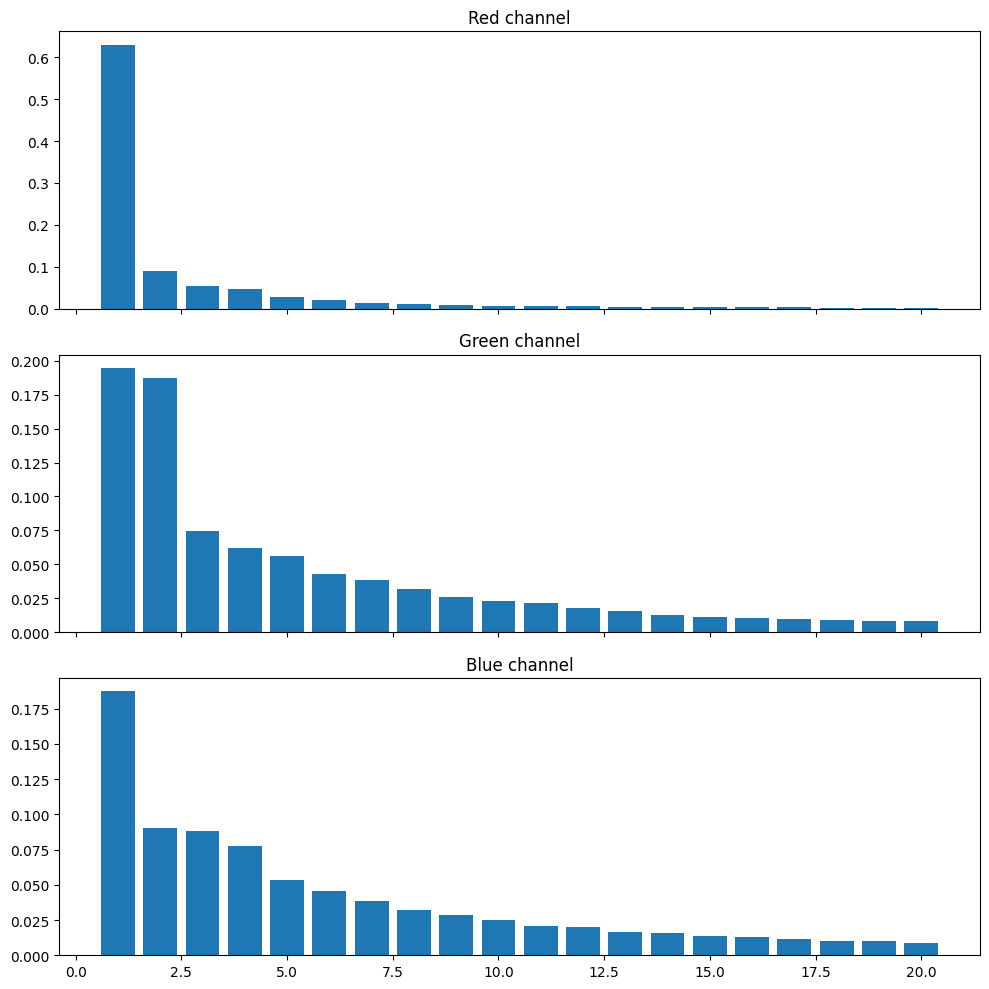

In [56]:
# Plot explained variance ratio for each channel
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
ax0.bar(range(1, n_components+1), pca_red.explained_variance_ratio_)
ax0.set_title("Red channel")
ax1.bar(range(1, n_components+1), pca_green.explained_variance_ratio_)
ax1.set_title("Green channel")
ax2.bar(range(1, n_components+1), pca_blue.explained_variance_ratio_)
ax2.set_title("Blue channel")
_ = plt.tight_layout()

In [57]:
# Reconstruct the image from the transformed arrays
red_arr = pca_red.inverse_transform(trans_pca_red)
green_arr = pca_green.inverse_transform(trans_pca_green)
blue_arr = pca_blue.inverse_transform(trans_pca_blue)
image_reduced = cv2.merge([red_arr, green_arr, blue_arr])
print(image_reduced.shape)

(256, 256, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


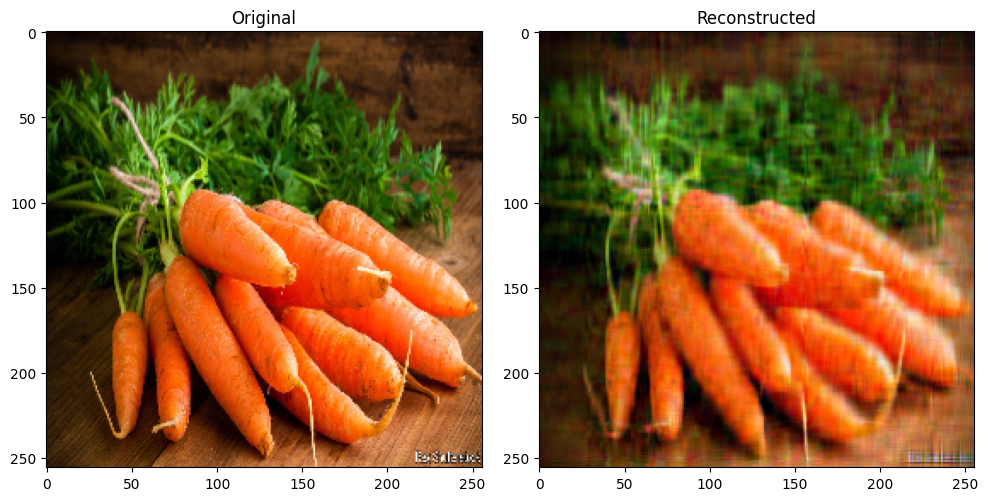

In [58]:
# Plot the original and reconstructed images
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 10))
ax0.imshow(image)
ax0.set_title("Original")
ax1.imshow(image_reduced)
ax1.set_title("Reconstructed")
plt.tight_layout()

In [59]:
# Create feature matrix using transformed arrays
feature_matrix = np.dstack((trans_pca_red, trans_pca_green, trans_pca_blue))

In [61]:
feature_matrix.shape

(256, 20, 3)

In [63]:
feature_matrix[0, 0]

array([ 4.81396943, -1.99785992, -0.63546648])

In [65]:
trans_pca_red[0, 0], trans_pca_green[0, 0], trans_pca_blue[0, 0]

(4.8139694279800604, -1.9978599233935337, -0.6354664841356122)